In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import QuantileTransformer, Normalizer
import statsmodels.api as sm
%matplotlib inline

//anaconda/lib/python2.7/site-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)
//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note tha

##Load data

In [2]:
num_prev_blocks = 50

In [3]:
df = pd.read_csv('./../data/data_filtered.csv')

In [4]:
df_avg = pd.read_csv('./../data/block_avg_{}.csv'.format(num_prev_blocks))

In [5]:
np.unique(df['block_id'].values).shape

(14470,)

##Merge data

In [6]:
df.columns

Index([u'Unnamed: 0', u'hash_t', u'accountNonce', u'amount', u'block_id',
       u'gasLimit_t', u'gasUsed_t', u'newContract', u'price', u'time_t',
       u'txIndex', u'type', u'blockTime', u'difficulty', u'gasLimit_b',
       u'gasUsed_b', u'reward', u'size', u'time_b', u'totalFee', u'tx_count',
       u'uncle_count', u'amount_binary', u'price_gwei', u'day', u'hour',
       u'minute', u'second', u'dayofweek', u'amount_eth', u'type_enc',
       u'txcnt_second', u'avg_gasUsed_t_perblock', u'avg_price_perblock'],
      dtype='object')

In [7]:
df_avg.columns

Index([u'Unnamed: 0', u'avg_blocktime', u'avg_gasUsed_b', u'avg_tx_count',
       u'avg_uncle_count', u'avg_difficulty', u'avg_txcnt_second',
       u'avg_gasUsed_t', u'avg_price', u'blockids'],
      dtype='object')

In [8]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
df_avg.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
df_avg.shape

(14470, 9)

In [11]:
df.shape[1] + df_avg.shape[1]

42

In [12]:
df_avg.head()

,avg_blocktime,avg_gasUsed_b,avg_tx_count,avg_uncle_count,avg_difficulty,avg_txcnt_second,avg_gasUsed_t,avg_price,blockids
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4286251
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4286252
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4286253
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4286254
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4286255


In [13]:
merged = pd.merge(df, df_avg, left_on='block_id', right_on='blockids')

In [14]:
merged.columns

Index([u'hash_t', u'accountNonce', u'amount', u'block_id', u'gasLimit_t',
       u'gasUsed_t', u'newContract', u'price', u'time_t', u'txIndex', u'type',
       u'blockTime', u'difficulty', u'gasLimit_b', u'gasUsed_b', u'reward',
       u'size', u'time_b', u'totalFee', u'tx_count', u'uncle_count',
       u'amount_binary', u'price_gwei', u'day', u'hour', u'minute', u'second',
       u'dayofweek', u'amount_eth', u'type_enc', u'txcnt_second',
       u'avg_gasUsed_t_perblock', u'avg_price_perblock', u'avg_blocktime',
       u'avg_gasUsed_b', u'avg_tx_count', u'avg_uncle_count',
       u'avg_difficulty', u'avg_txcnt_second', u'avg_gasUsed_t', u'avg_price',
       u'blockids'],
      dtype='object')

In [15]:
merged.shape

(629224, 42)

In [16]:
#find null values
for col in merged.columns:
    print(col, merged[col].isnull().sum())

('hash_t', 0)
('accountNonce', 0)
('amount', 0)
('block_id', 0)
('gasLimit_t', 0)
('gasUsed_t', 0)
('newContract', 0)
('price', 0)
('time_t', 0)
('txIndex', 534929)
('type', 0)
('blockTime', 0)
('difficulty', 0)
('gasLimit_b', 0)
('gasUsed_b', 0)
('reward', 0)
('size', 0)
('time_b', 0)
('totalFee', 0)
('tx_count', 0)
('uncle_count', 0)
('amount_binary', 0)
('price_gwei', 0)
('day', 0)
('hour', 0)
('minute', 0)
('second', 0)
('dayofweek', 0)
('amount_eth', 0)
('type_enc', 0)
('txcnt_second', 0)
('avg_gasUsed_t_perblock', 0)
('avg_price_perblock', 0)
('avg_blocktime', 4587)
('avg_gasUsed_b', 4587)
('avg_tx_count', 4587)
('avg_uncle_count', 4587)
('avg_difficulty', 4587)
('avg_txcnt_second', 4587)
('avg_gasUsed_t', 4587)
('avg_price', 4587)
('blockids', 0)


In [17]:
merged.drop('txIndex', axis=1, inplace=True)

In [18]:
merged.dropna(inplace=True)

In [19]:
#find null values
for col in merged.columns:
    print(col, merged[col].isnull().sum())

('hash_t', 0)
('accountNonce', 0)
('amount', 0)
('block_id', 0)
('gasLimit_t', 0)
('gasUsed_t', 0)
('newContract', 0)
('price', 0)
('time_t', 0)
('type', 0)
('blockTime', 0)
('difficulty', 0)
('gasLimit_b', 0)
('gasUsed_b', 0)
('reward', 0)
('size', 0)
('time_b', 0)
('totalFee', 0)
('tx_count', 0)
('uncle_count', 0)
('amount_binary', 0)
('price_gwei', 0)
('day', 0)
('hour', 0)
('minute', 0)
('second', 0)
('dayofweek', 0)
('amount_eth', 0)
('type_enc', 0)
('txcnt_second', 0)
('avg_gasUsed_t_perblock', 0)
('avg_price_perblock', 0)
('avg_blocktime', 0)
('avg_gasUsed_b', 0)
('avg_tx_count', 0)
('avg_uncle_count', 0)
('avg_difficulty', 0)
('avg_txcnt_second', 0)
('avg_gasUsed_t', 0)
('avg_price', 0)
('blockids', 0)


(0, 100)

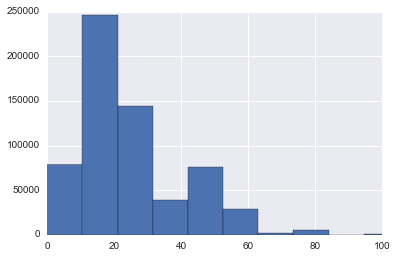

In [20]:
merged['price_gwei'].hist(bins=2000)
plt.xlim(0,100)

In [21]:
np.log(merged['price_gwei'].values)

array([ 3.04452244,  3.04452244,  3.04452244, ...,  3.04452244,
        3.04452244,  3.40119738])

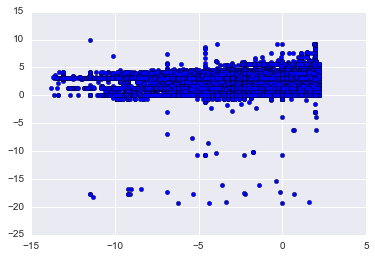

In [22]:
plt.scatter(np.log(merged['amount_eth'].values), np.log(merged['price_gwei'].values))

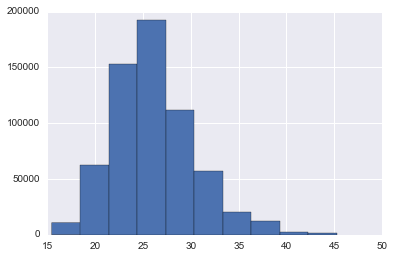

In [23]:
merged['avg_blocktime'].hist()

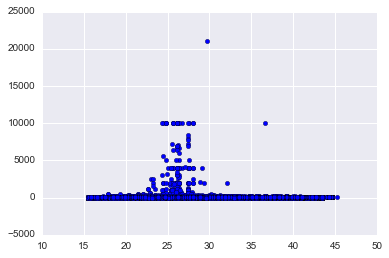

In [24]:
plt.scatter(merged['avg_blocktime'], merged['price_gwei'])

#Select features for modeling

In [25]:
features = [
        'newContract',
        'day',
        'hour',
        'dayofweek',
        'amount_eth',
        'type_enc',
        'avg_price',
        'avg_blocktime',
        'avg_gasUsed_b',
        'avg_tx_count',
        'avg_uncle_count',
        'avg_difficulty',
        'avg_txcnt_second',
        'avg_gasUsed_t'
        ]
X = merged[features].values
y = merged['price_gwei'].values
X_train, X_test, y_train, y_test = train_test_split(X, y)

###Scale features

In [26]:
#sklearn quantile transformer
quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=0)
X_train_trans = quantile_transformer.fit_transform(X_train)
X_test_trans = quantile_transformer.transform(X_test)

In [27]:
#normalize
normalizer = Normalizer().fit(X_train)
X_train_norm = normalizer.transform(X_train) 
normalizer = Normalizer().fit(X_test)
X_test_norm = normalizer.transform(X_test) 

##Linear regression

In [28]:
def linear_regression(X_train, X_test, y_train, y_test):
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    scores = cross_val_score(lr, X_train, y_train, scoring='r2', cv=5)
    print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))
    print('R2_score: {}'.format(r2_score(y_test, y_pred)))
    print('avg_CV_score: {}'.format(np.mean(scores)))
    return lr

In [29]:
linear_regression(X_train, X_test, y_train, y_test)

MSE: 7588.98821218
R2_score: 0.0101372193301
avg_CV_score: 0.0103448109223


//anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
# get summary statistics from statsmodels
model = sm.OLS(y_train, X_train)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     963.5
Date:                Sat, 30 Sep 2017   Prob (F-statistic):               0.00
Time:                        11:48:11   Log-Likelihood:            -2.7416e+06
No. Observations:              468477   AIC:                         5.483e+06
Df Residuals:                  468472   BIC:                         5.483e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -1.916e-07   2.81e-08     -6.820      0.000   -2.47e-07   -1.37e-07
x2             0.0437      0.006      7.579      0.000       0.032       0.055
x3             0.1148      0.019      6.118      0.000       0.078       0.152
x4            -0.0187      0.003     -7.245      0.000      -0.024      -0.014
x5             0.0422      0.001     43.343      0.000       0.040       0.044
x6             0.0127      0.001     16.646      0.000       0.011       0.014
x7             0.8724      0.015     59.623      0.000       0.844       0.901
x8             0.2656      0.029      9.280      0.000       0.209       0.322
x9          7.307e-07   2.11e-07      3.471      0.001    3.18e-07    1.14e-06
x10            0.0043      0.006      0.674      0.500      -0.008       0.017
x11        -8.441e-05    2.7e-05     -3.126      0.002      -0.000   -3.15e-05
x12        -2.924e-15   2.96e-16     -9.870      0.000    -3.5e-15   -2.34e-15
x13           -0.1318      0.009    -14.199      0.000      -0.150      -0.114
x14        -5.309e-05   7.38e-06     -7.191      0.000   -6.76e-05   -3.86e-05
==============================================================================
Omnibus:                  1799321.142   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    1798231402406.238
Skew:                          90.467   Prob(JB):                         0.00
Kurtosis:                    9599.372   Cond. No.                     1.05e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+18. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
for num, col in enumerate(merged[features].columns):
    print(num+1, col)

(1, 'newContract')
(2, 'day')
(3, 'hour')
(4, 'dayofweek')
(5, 'amount_eth')
(6, 'type_enc')
(7, 'avg_price')
(8, 'avg_blocktime')
(9, 'avg_gasUsed_b')
(10, 'avg_tx_count')
(11, 'avg_uncle_count')
(12, 'avg_difficulty')
(13, 'avg_txcnt_second')
(14, 'avg_gasUsed_t')


###Plot the avg MSE with respect to the number of blocks used
- Need to determine how many previous blocks to look at in order to get predictive features

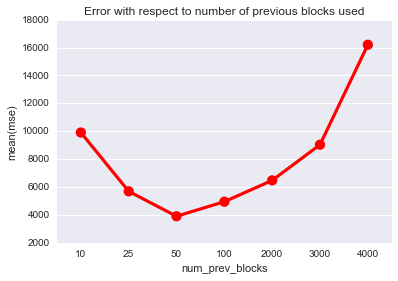

In [32]:
mse=[9906, 5689.59, 3902.42, 4946.9, 6474.36, 9032.47, 16197.49]
num_prev = [10, 25, 50, 100, 2000, 3000, 4000]
results = pd.DataFrame({'num_prev_blocks': num_prev, 'mse': mse})
sns.pointplot(x="num_prev_blocks", y="mse", data=results, color='r')
plt.title('Error with respect to number of previous blocks used')
plt.savefig('./../images/mse_prev_blocks.png')

The MSE seems to be minimal when using 50 previous blocks

##KNN regression

In [33]:
def knn_regressor(X_train, X_test, y_train, y_test):
    model = KNeighborsRegressor(n_neighbors=5, metric='cosine', weights='uniform')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('CV score: {} | MSE: {} | R^2: {}'.format(np.mean(cross_val_score(model, X_train, y_train)), 
                                                    mean_squared_error(y_test, y_pred), 
                                                    r2_score(y_test, y_pred)))

##Random forest regressor

In [34]:
def rf_regressor(X_train, X_test, y_train, y_test):
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    scores = cross_val_score(rf, X_train, y_train, scoring='r2', cv=5)
    print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))
    print('R2_score: {}'.format(r2_score(y_test, y_pred)))
    print('avg_CV_score: {}'.format(np.mean(scores)))
    return rf

In [35]:
model = rf_regressor(X_train, X_test, y_train, y_test)

MSE: 7175.33647945
R2_score: 0.064091507167
avg_CV_score: 0.0494707596852


In [36]:
def plot_feature_importance(rf, feature_df):
    cols = []
    for col in feature_df.columns:
        cols.append(col)

    feat_scores = pd.DataFrame({'Fraction of Samples Affected' : rf.feature_importances_},
                           index=cols)
    feat_scores = feat_scores.sort_values(by='Fraction of Samples Affected')
    feat_scores.plot(kind='barh', color='r', figsize=(6,6))
    plt.xlabel('Importance', fontsize=18)
    plt.title('Feature Importance', fontsize=18)
    plt.savefig('./../images/feat_import_50.png')

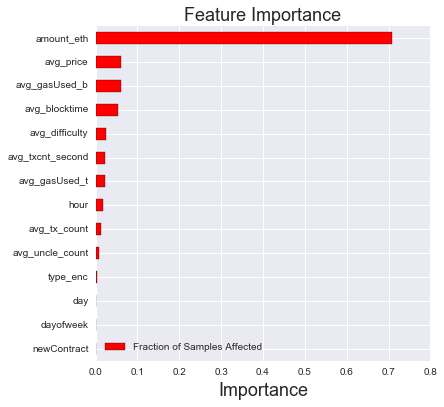

In [37]:
plot_feature_importance(model, merged[features])